# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from collections import Counter

%matplotlib inline

In [2]:
dataset = get_dataset('data/waymo/training_and_validation/*.tfrecord')

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 97
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


In [7]:
dataset1 = get_dataset('data/waymo/val/*.tfrecord')

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/val/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/val/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 20


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    #colormap
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
    
    f, ax = plt.subplots(2, 5, figsize=(20, 10))
           
    for i, sample in enumerate(batch):
        x = i % 2
        y = i % 5
        
        # get sample
        img = sample["image"].numpy()
        image_shape = img.shape
        
        ax[x, y].imshow(img)
           
        # add bounding box
        bboxes = sample["groundtruth_boxes"].numpy()
        classes = sample["groundtruth_classes"].numpy()

        for bb, cl in zip(bboxes, classes):
            y1, x1, y2, x2 = bb
            y1 = y1 * image_shape[0]
            x1 = x1 * image_shape[1]
            y2 = y2 * image_shape[0] 
            x2 = x2 * image_shape[1]
            rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor=colormap[cl])
            ax[x, y].add_patch(rec)

    plt.tight_layout
    plt.show()
    
    return

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

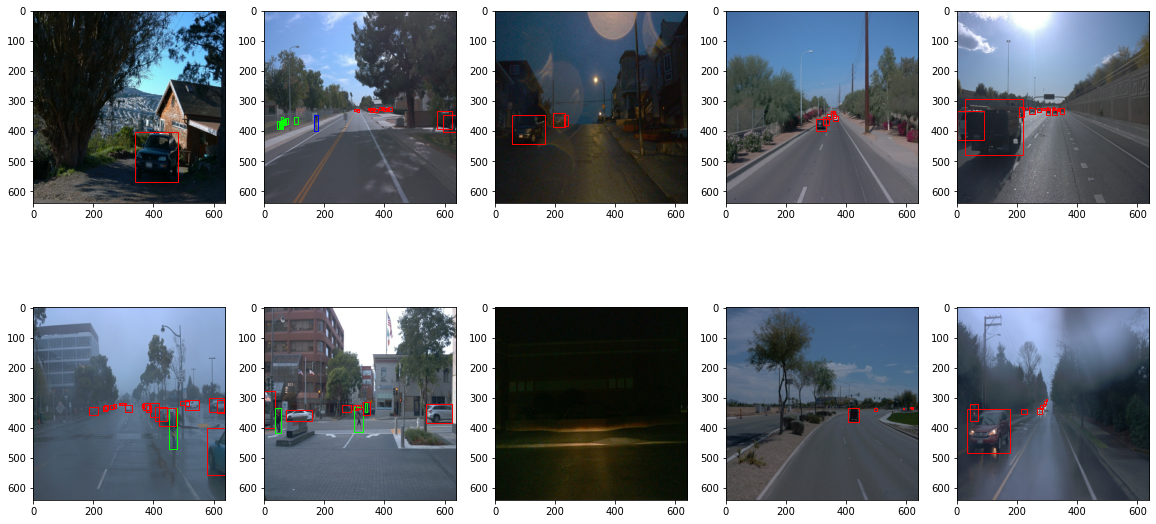

In [10]:
## STUDENT SOLUTION HERE
dataset.shuffle(100)
batch = dataset.take(10)
display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [11]:
def _count(batch):
    cl_count = {1: 0, 2: 0, 4: 0}
    obj_count = Counter(cl_count)
    for i, sample in enumerate(batch):
        img = sample['image'].numpy()
        gt_class = sample['groundtruth_classes'].numpy()
        obj_count += Counter(gt_class)
        
    return obj_count

In [12]:
batch = dataset.take(10000)
label_mapping = {1: 'vehicle', 2: 'pedestrain', 4: 'cyclist'}
label_name = []
obj_num = []
for k, v in _count(batch).items():
    label_name.append(label_mapping[k])
    obj_num.append(v)
    print("Total number of {} among 10000 images: {}" .format(label_mapping[k], v))

Total number of vehicle among 10000 images: 181114
Total number of pedestrain among 10000 images: 54285
Total number of cyclist among 10000 images: 1379


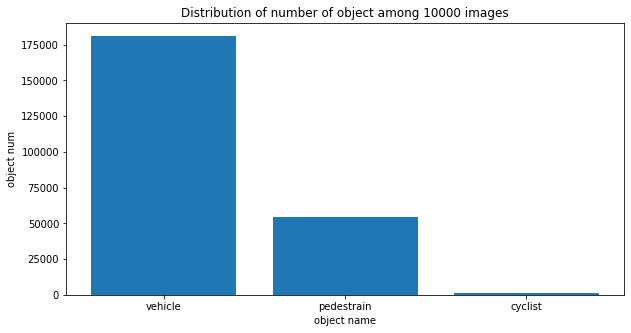

In [13]:
fig = plt.figure(figsize=(10,5))
plt.bar(label_name, obj_num)
plt.xlabel('object name')
plt.ylabel('object num')
plt.title('Distribution of number of object among 10000 images')
plt.show()


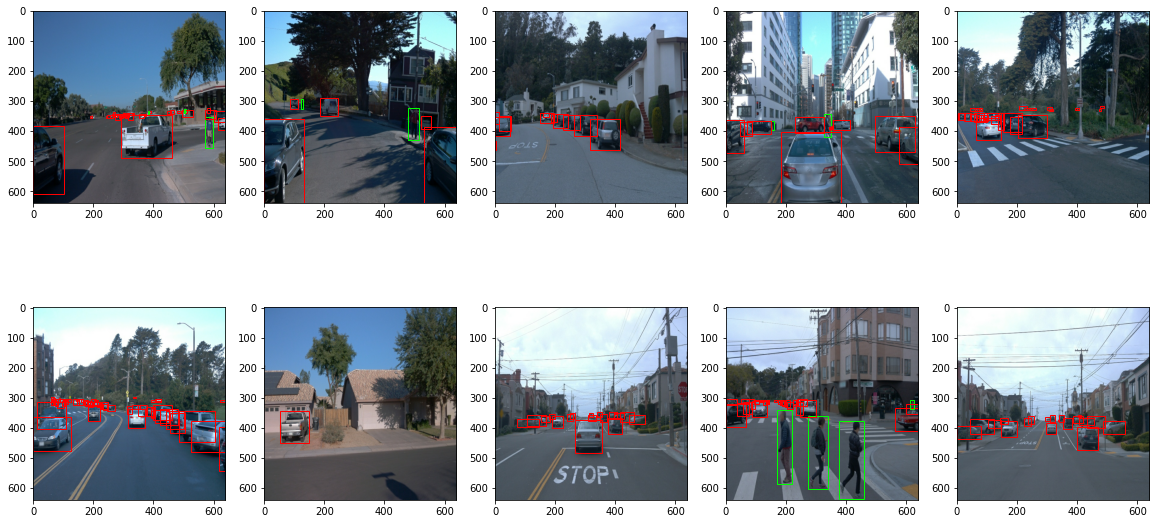

In [15]:
dataset1.shuffle(100)
batch = dataset1.take(10)
display_instances(batch)
